# example

In [1]:
from sklearn.datasets import load_digits
digits_data = load_digits().data

In [2]:
import matplotlib.pyplot as plt
print(digits_data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


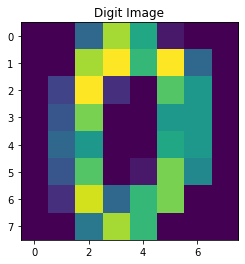

In [3]:
sample_digit = digits_data[0].reshape(8,8)
plt.imshow(sample_digit)
plt.title('Digit Image')
plt.show()

In [4]:
from sklearn.preprocessing import scale
scaled_data = scale(digits_data)
print(scaled_data)
Y = load_digits().target
print(Y)

[[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]
[0 1 2 ... 8 9 8]


# Method 1 : Random

In [5]:
from sklearn.cluster import KMeans
k = 10
kmeans_cluster = KMeans(init='random', n_clusters=k, n_init=10, random_state=0)

# Method 2 : K means

In [6]:
kmeans_cluster = KMeans(init="k-means++", n_clusters=k, n_init=10, random_state=0)

In [7]:
def bench_k_means(estimator, name, data):
    initial_time = time()
    estimator.fit(data)
    print("Initial-cluster: " + name)
    print("Time taken: {0:0.3f}".format(time() - initial_time))
    print("Homogeneity: {0:0.3f}".format( metrics.homogeneity_score(Y, estimator.labels_)))
    print("Completeness: {0:0.3f}".format( metrics.completeness_score(Y, estimator.labels_)))
    print("V_measure: {0:0.3f}".format( metrics.v_measure_score(Y, estimator.labels_)))
    print("Adjusted random: {0:0.3f}".format( metrics.adjusted_rand_score(Y, estimator.labels_)))
    print("Adjusted mutual info: {0:0.3f}".format(metrics.adjusted_mutual_info_score(Y, estimator.labels_)))
    print("Silhouette: {0:0.3f}".format(metrics.silhouette_score(data, estimator.labels_, metric='euclidean',sample_size=300)))

In [8]:
# kmeans_cluster = KMeans(init="random", n_clusters=k, n_init=10, random_state=0)
# bench_k_means(estimator=kmeans_cluster, name="random", data=digits_data)
# kmeans_cluster = KMeans(init="k-means++", n_clusters=k,n_init=10, random_state=0)
# bench_k_means(estimator=kmeans_cluster, name="random", data=digits_data)

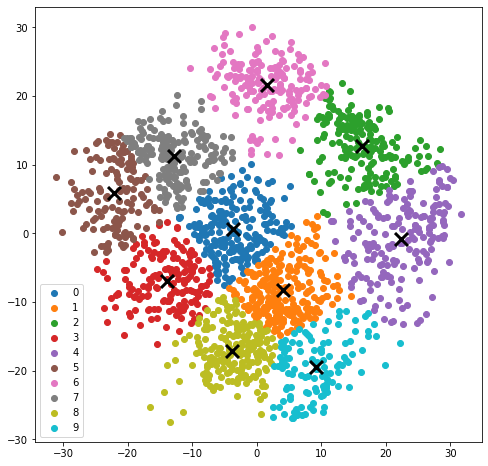

In [9]:
from sklearn.decomposition import PCA
import numpy as np
# Reducing the dataset
pca = PCA(2)
reduced_data = pca.fit_transform(digits_data)
kmeans_cluster.fit(reduced_data)
# Calculating the centroids
centroids = kmeans_cluster.cluster_centers_
label = kmeans_cluster.fit_predict(reduced_data)
unique_labels = np.unique(label)
# plotting the clusters:
plt.figure(figsize=(8, 8))
for i in unique_labels:
    plt.scatter(reduced_data[label == i, 0], reduced_data[label == i, 1], label=i)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='k', zorder=10)
plt.legend()
plt.show()

# 2. Hierarchical Clustering

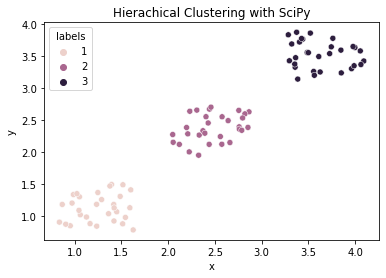

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import rand
import pandas as pd
import seaborn as sns
from scipy.cluster.vq import whiten
from scipy.cluster.hierarchy import fcluster, linkage
# Generate initial data
data = np.vstack(((rand(30,2)+1), (rand(30,2)+2.5), (rand(30,2)+4) ))
# standardize (normalize) the features
data = whiten(data)
# Compute the distance matrix
matrix = linkage( data, method='ward', metric='euclidean')

# Assign cluster labels
labels = fcluster( matrix, 3, criterion='maxclust')
# Create DataFrame
df = pd.DataFrame(data, columns=['x','y'])
df['labels'] = labels
# Plot Clusters
sns.scatterplot( x='x', y='y', hue='labels', data=df )
plt.title('Hierachical Clustering with SciPy')
plt.show()

# Questions

1. Write a python code without using scikit-learn library, to create a DataFrame that contains the following three
variables for 20 different basketball players:
Apply the K.means algorithm to identify the clusters and to do the following.
a. Plot that displays the number of clusters on the x-axis and the Sum Squared Error (SSE) on the y-axis
b. Plot the clusters in different color.

In [11]:
import pandas as pd
data = pd.read_csv('data.csv')
data.head()

,points,assists,rebounds
0,18.0,3.0,15
1,19.0,4.0,14
2,14.0,5.0,10
3,14.0,4.0,8
4,11.0,7.0,14


In [12]:
values = data.to_numpy()

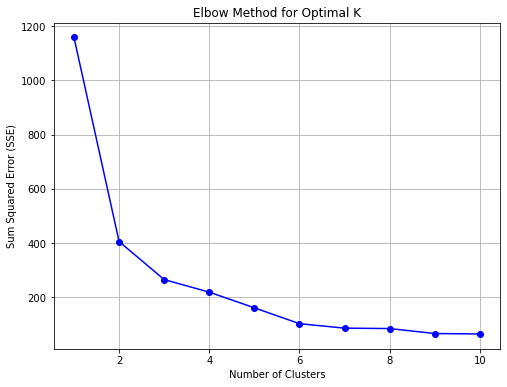

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def kmeans(X, k=3, max_iters=100, tol=1e-4):
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids
    sse = np.sum((X - centroids[labels]) ** 2)
    return labels, centroids, sse

# Generate random data with 3 variables (features)
# np.random.seed(0)
# X = np.random.rand(100, 3)

# Calculate SSE for different numbers of clusters (k)
k_values = range(1, 11)
sse_values = []

for k in k_values:
    labels, _, sse = kmeans(values, k=k)
    sse_values.append(sse)

# Plot SSE vs. number of clusters
plt.figure(figsize=(8, 6))
plt.plot(k_values, sse_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum Squared Error (SSE)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


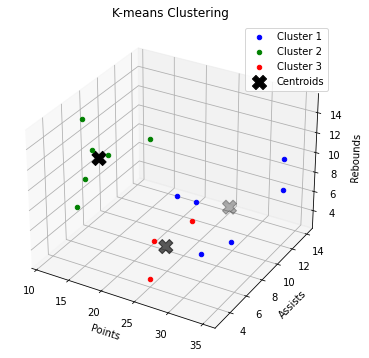

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def kmeans(X, k=3, max_iters=100, tol=1e-4):
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids
    sse = np.sum((X - centroids[labels]) ** 2)
    return labels, centroids, sse

# Read data from CSV file
data = pd.read_csv('data.csv')
X = data[['points', 'assists', 'rebounds']].values

# Perform K-means clustering with k=3
labels, centroids, _ = kmeans(X, k=3)

# Define distinct colors for clusters
colors = ['b', 'g', 'r']

# Plot the clusters with distinct colors
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for i in range(3):
    cluster_points = X[labels == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], color=colors[i], label=f'Cluster {i+1}', depthshade=False)

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='black', marker='X', s=200, label='Centroids')
ax.set_xlabel('Points')
ax.set_ylabel('Assists')
ax.set_zlabel('Rebounds')
plt.title('K-means Clustering')
plt.legend()
plt.show()


2. Consider the following data set and apply the hierarchical data-clustering algorithm, to identify the clusters.
Write a python code without using scikit-learn library to do the following.
a. Plot that displays the number of clusters on the x-axis and the Sum Squared Error (SSE) on the y-axis.
b. Plot the dendrogram for single, complete, average and ward.
c. Display the clusters along with points.

/tmp/ipykernel_6839/3637225322.py:34: RuntimeWarning: Mean of empty slice.
  cluster_centers = [points[labels == i].mean(axis=0) for i in range(1, k + 1)]
/usr/lib/python3/dist-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


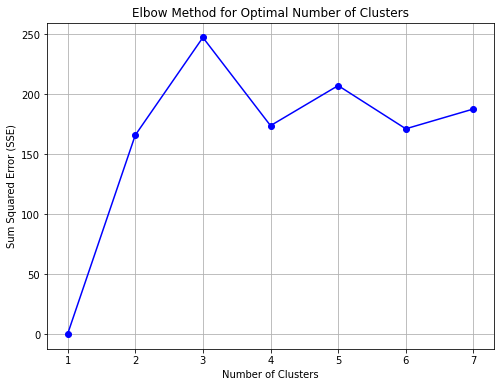

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, fcluster

# Data points
data = {
    'p1': [1, 1],
    'p2': [3, 2],
    'p3': [9, 1],
    'p4': [3, 7],
    'p5': [7, 2],
    'p6': [9, 7],
    'p7': [4, 8],
    'p8': [8, 3],
    'p9': [1, 4]
}

# Convert data to numpy array
points = np.array([v for v in data.values()])

# Calculate pairwise distances between points
distances = pdist(points)

# Perform hierarchical clustering
linkage_matrix = linkage(distances, method='ward')

# Calculate SSE for different numbers of clusters
sse_values = []
max_clusters = len(points)
for k in range(1, max_clusters + 1):
    labels = fcluster(linkage_matrix, k, criterion='maxclust')
    cluster_centers = [points[labels == i].mean(axis=0) for i in range(1, k + 1)]
    sse = np.sum([np.sum((points[labels == i] - center) ** 2) for i, center in enumerate(cluster_centers)])
    sse_values.append(sse)

# Plot SSE vs. number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters + 1), sse_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum Squared Error (SSE)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()


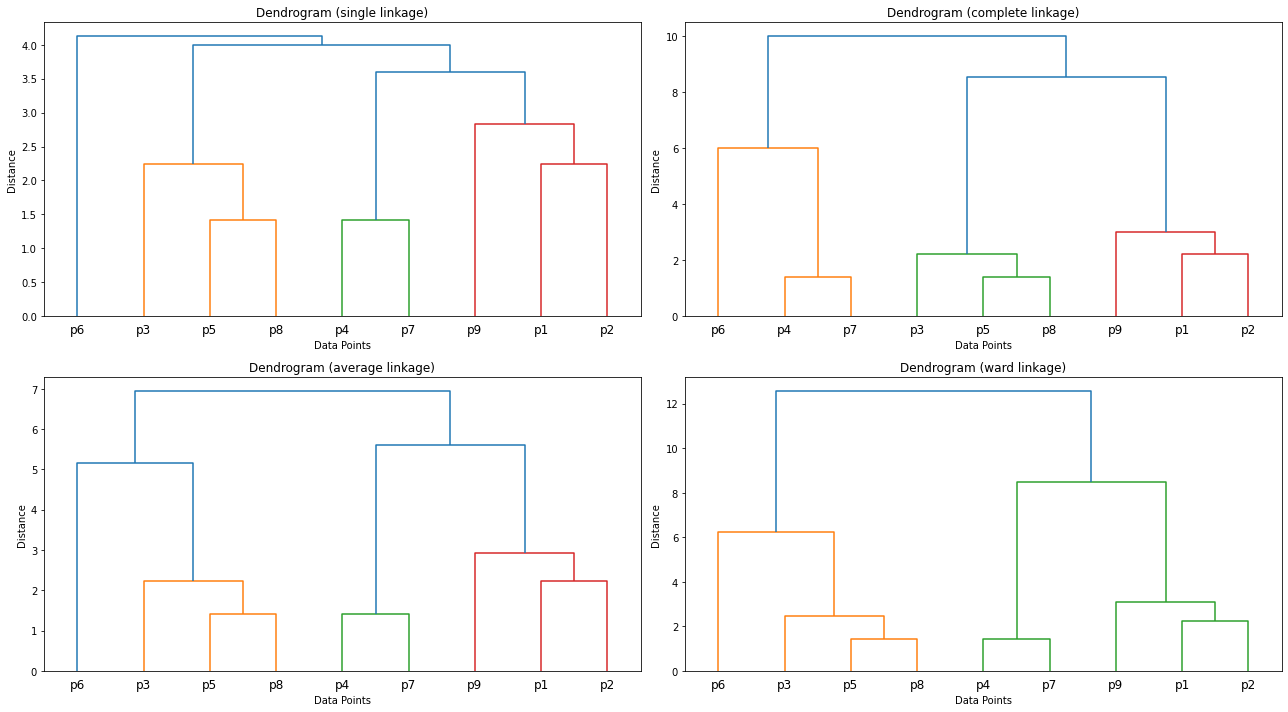

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

# Convert data to numpy array
points = np.array([v for v in data.values()])

# Calculate pairwise distances between points
distances = pdist(points)

# Linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']

# Plot dendrogram for each linkage method
plt.figure(figsize=(18, 10))
for i, method in enumerate(linkage_methods, 1):
    plt.subplot(2, 2, i)
    linkage_matrix = linkage(distances, method=method)
    dendrogram(linkage_matrix, labels=list(data.keys()))
    plt.title(f'Dendrogram ({method} linkage)')
    plt.xlabel('Data Points')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()


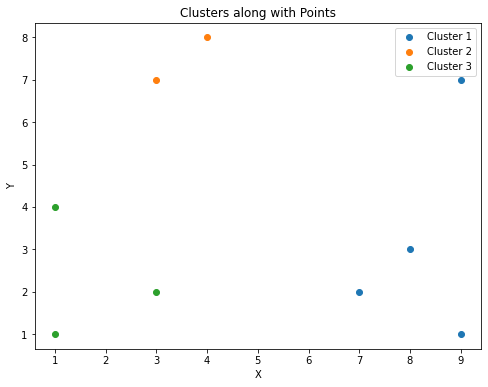

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, fcluster

# Convert data to numpy array
points = np.array([v for v in data.values()])

# Calculate pairwise distances between points
distances = pdist(points)

# Perform hierarchical clustering with ward linkage
linkage_matrix = linkage(distances, method='ward')

# Determine the number of clusters (you can adjust this based on the dendrogram)
num_clusters = 3

# Assign cluster labels to data points
labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Plot clusters along with points
plt.figure(figsize=(8, 6))
for i in range(1, num_clusters + 1):
    cluster_points = points[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clusters along with Points')
plt.legend()
plt.show()
